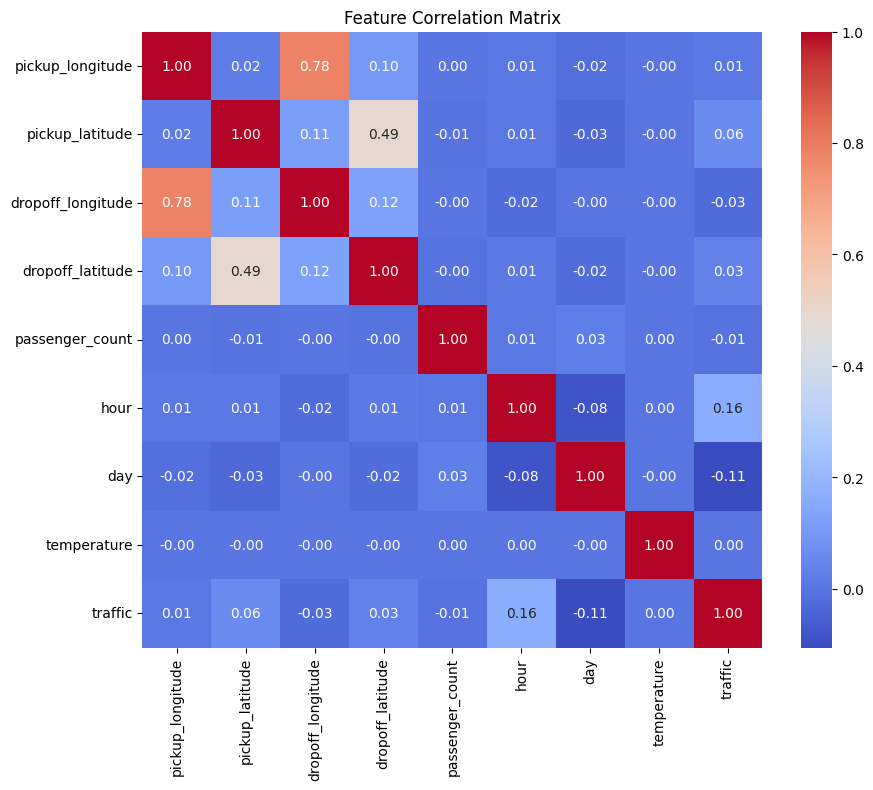

In [2]:
import sys
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path

if 'ipykernel' in sys.modules:
    ROOT_DIR = Path.cwd().parent
else:
    ROOT_DIR = Path(__file__).resolve().parent

DATA_PATH = ROOT_DIR / "data" / "processed" / "merged_data.csv"
df = pd.read_csv(DATA_PATH)

numeric_df = df.select_dtypes(include=['number'])

plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Matrix")
plt.show()

In [3]:
from sklearn.preprocessing import LabelEncoder

le_zone = LabelEncoder()
le_weather = LabelEncoder()

df['zone'] = le_zone.fit_transform(df['zone'])
df['weather'] = le_weather.fit_transform(df['weather'])


In [4]:
df = pd.read_csv(DATA_PATH) 

X = df.drop(columns=['surge_label', 'pickup_datetime', 'date'])
y = df['surge_label']

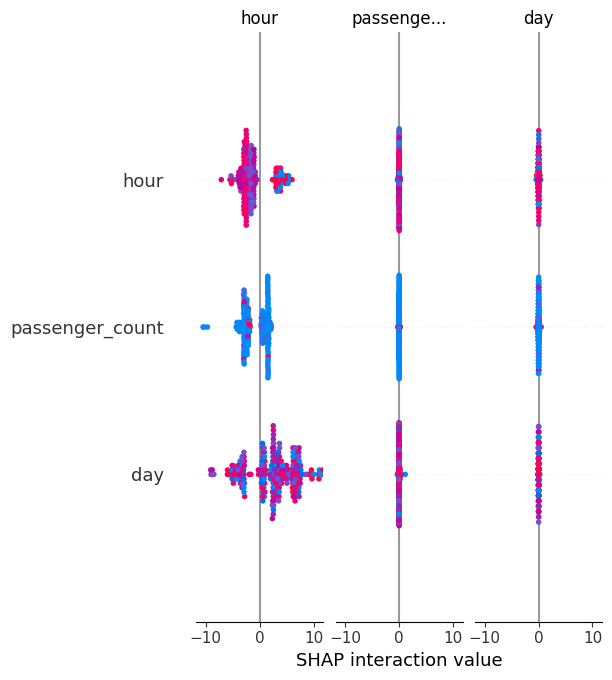

In [10]:
import sys
import joblib
import shap
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
from sklearn.preprocessing import LabelEncoder

if 'ipykernel' in sys.modules:
    ROOT_DIR = Path.cwd().parent
else:
    ROOT_DIR = Path(__file__).resolve().parent

MODELS_DIR = ROOT_DIR / "models"
DATA_PATH = ROOT_DIR / "data" / "processed" / "merged_data.csv"

model = joblib.load(MODELS_DIR / "surge_model.pkl")
df = pd.read_csv(DATA_PATH)

X = df.drop(columns=['surge_label', 'pickup_datetime', 'date', 
                     'pickup_longitude', 'pickup_latitude', 
                     'dropoff_longitude', 'dropoff_latitude'], errors='ignore')

le_zone = LabelEncoder()
X['zone'] = le_zone.fit_transform(X['zone'].astype(str))

le_weather = LabelEncoder()
X['weather'] = le_weather.fit_transform(X['weather'].astype(str))

explainer = shap.TreeExplainer(model)
sample = X.sample(300, random_state=42)
shap_values = explainer.shap_values(sample)

if isinstance(shap_values, list):
    shap.summary_plot(shap_values[2], sample)
else:
    shap.summary_plot(shap_values, sample)

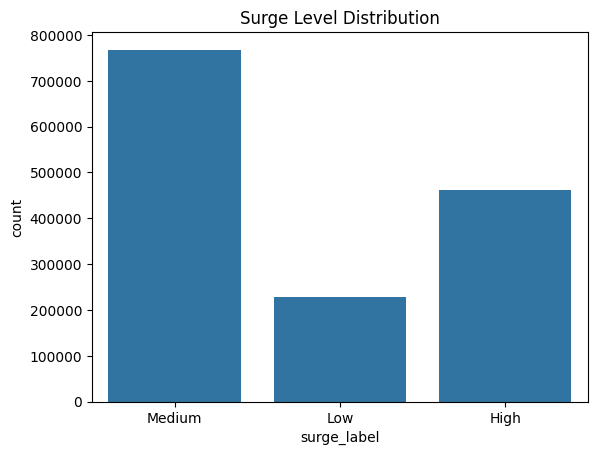

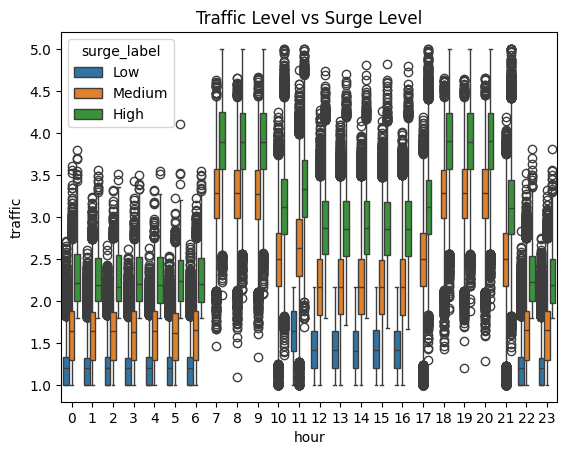

In [11]:
sns.countplot(x="surge_label", data=df)
plt.title("Surge Level Distribution")
plt.show()

sns.boxplot(x="hour", y="traffic", hue="surge_label", data=df)
plt.title("Traffic Level vs Surge Level")
plt.show()

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

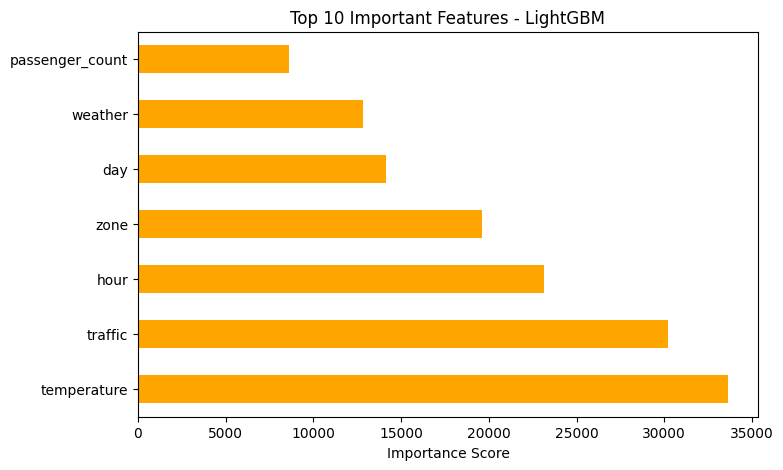

In [14]:
if 'ipykernel' in sys.modules:
    ROOT_DIR = Path.cwd().parent
else:
    ROOT_DIR = Path(__file__).resolve().parent

MODELS_DIR = ROOT_DIR / "models"

model = joblib.load(MODELS_DIR / "surge_model.pkl")
feature_names = joblib.load(MODELS_DIR / "feature_names.pkl")

importances = model.feature_importances_

feat_imp = pd.Series(importances, index=feature_names).sort_values(ascending=False)

plt.figure(figsize=(8,5))
feat_imp.head(10).plot(kind='barh', color='orange')
plt.title("Top 10 Important Features - LightGBM")
plt.xlabel("Importance Score")
plt.show()

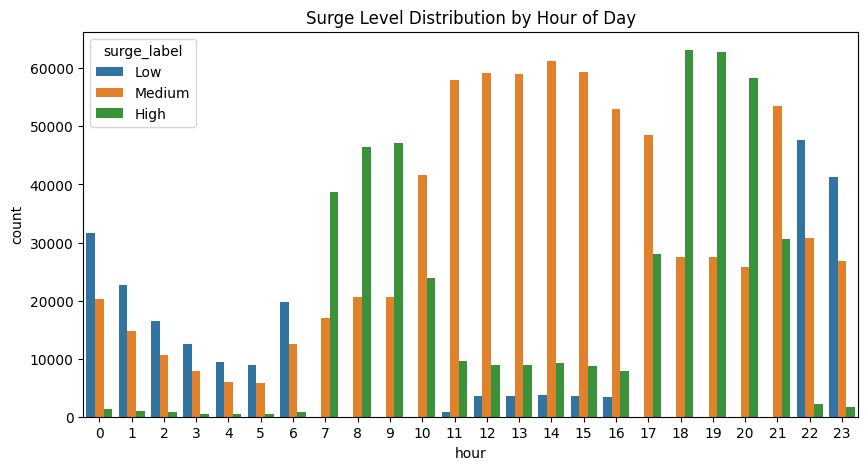

In [15]:
plt.figure(figsize=(10,5))
sns.countplot(x='hour', hue='surge_label', data=df)
plt.title("Surge Level Distribution by Hour of Day")
plt.show()

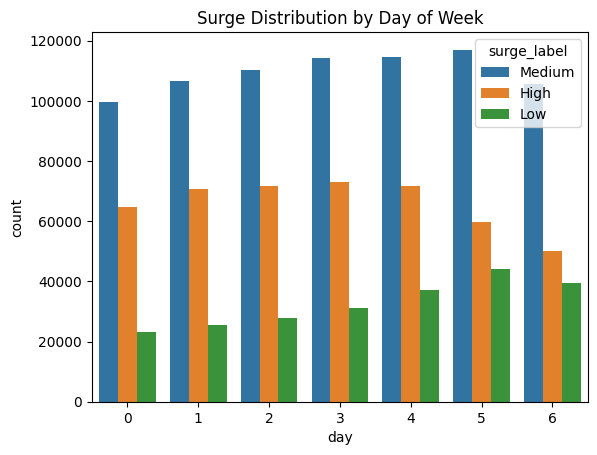

In [16]:
sns.countplot(x='day', hue='surge_label', data=df)
plt.title("Surge Distribution by Day of Week")
plt.show()

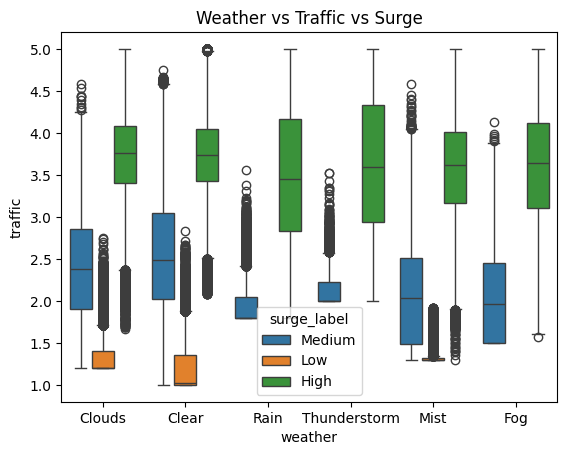

In [17]:
sns.boxplot(x='weather', y='traffic', hue='surge_label', data=df)
plt.title("Weather vs Traffic vs Surge")
plt.show()

<Figure size 800x400 with 0 Axes>

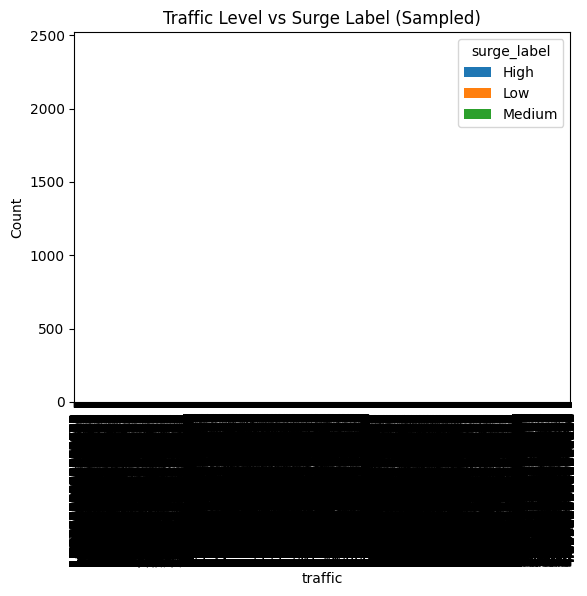

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

df_small = df.sample(50000, random_state=42)

plt.figure(figsize=(8,4))
pd.crosstab(df_small['traffic'], df_small['surge_label']).plot(kind='bar')
plt.title("Traffic Level vs Surge Label (Sampled)")
plt.ylabel("Count")
plt.show()
